# Clasificador de noticias falsas
Para este problema contamos con un total de noticias falsas en inglés:





In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Pregunta
¿ Cual de estas variables puede ser utilizada dentro de un problema de clasificación de texto?
1. Número de palabras en un documento
2. Entidades específicas del documento
3. Idioma
4. Todas

# Cargamos los datos

In [3]:
df=pd.read_csv("data/fakerealnews.csv",index_col="Unnamed: 0")
df.head()

,label,text,title
4869,REAL,Hillary Clinton and Donald Trump made some ina...,Fact check: Trump and Clinton at the 'commande...
988,REAL,Donald Trump’s organizational problems have go...,Donald Trump’s Shockingly Weak Delegate Game S...
3078,REAL,While paging through Pew's best data visualiza...,The 1 chart that explains everything you need ...
7793,FAKE,By Dan Zukowski\nThree major U.S. pipeline spi...,220 ‘Significant’ Pipeline Spills Already This...
9403,FAKE,By INDRA WARNES \nIn a truly shocking twist th...,‘He didn’t know the boy didn’t want to be rape...


# Rápida inspección
Veamos número de noticias y si existen valores nulos.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 4869 to 4330
Data columns (total 3 columns):
label    634 non-null object
text     634 non-null object
title    634 non-null object
dtypes: object(3)
memory usage: 19.8+ KB


Veamos  si existen valores duplicados

In [5]:
df.describe()

,label,text,title
count,634,634,634
unique,2,612,633
top,FAKE,,Fighting Ghost Fascists While Aiding Real Ones
freq,318,8,2


Veamos  si tenemos balanceados los datos

In [6]:
df.label.value_counts()

FAKE    318
REAL    316
Name: label, dtype: int64

# Preprocesamientos de los datos

## Usando CountVectorizer
El proceso de Tokenización, Conversión a lowercase, Eliminar stopwords se realiza mediante CountVectorizer.


In [7]:

# guardamos los labels
y = df.label

# creamos un train y test set
X_train, X_test, y_train, y_test = train_test_split(df["text"],y,test_size=0.33,random_state=53)

# inizializamos para contar palabras
count_vectorizer = CountVectorizer(stop_words="english")

# Transformamos el train data
count_train = count_vectorizer.fit_transform(X_train)

# Transformamos el text data
count_test = count_vectorizer.transform(X_test)



## Usando TfidfVectorizer
El proceso de Tokenización, Conversión a lowercase, Eliminar stopwords se realiza mediante TfidfVectorizer.


In [8]:
# inicializamos el TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# transformamos el training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transformamos el test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# 10 features primeras
print(tfidf_vectorizer.get_feature_names()[:10])

# 5 vectores del tfidf vector
print(tfidf_train.A[:5])


['00', '000', '006s', '01', '016', '02', '03', '032', '033', '034']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
# Creamos el  CountVectorizer DataFrame: count_df
count_df  = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Creamos el  TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A,columns=tfidf_vectorizer.get_feature_names())

# cabecera del count_df
print(count_df.head())

# cabecera del  tfidf_df
print(tfidf_df.head())

# diferencia entre las columnas: difference
difference = set(tfidf_df.columns) - set(count_df.columns)
print(difference)




   00  000  006s  01  016  02  03  032  033  034 ...   œand  œart  œfolks  \
0   0    0     0   0    0   0   0    0    0    0 ...      0     0       0   
1   0    0     0   0    0   0   0    0    0    0 ...      0     0       0   
2   0    0     0   0    0   0   0    0    0    0 ...      0     0       0   
3   0    0     0   0    0   0   0    0    0    0 ...      0     0       0   
4   0    0     0   0    0   0   0    0    0    0 ...      0     0       0   

   œlife  œlikeâ  œthey  œtoday  œwe  œwhen  şđÿ  
0      0       0      0       0    0      0    0  
1      0       0      0       0    0      0    0  
2      0       0      0       0    0      0    0  
3      0       0      0       0    0      0    0  
4      0       0      0       0    0      0    0  

[5 rows x 21301 columns]
    00  000  006s   01  016   02   03  032  033  034 ...   œand  œart  œfolks  \
0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0.0   0.0     0.0   
1  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0 

## Modelización con Scikit Learn
Recordamos pasos:
- Inicializar el modelo con determinados parámetros
- Entrenar el modelo (fit)
- Predecir con el modelo (predict)
- evaluación de resultados con test

### Evaluación de resultados
Creamos la matrid de confusión para ello.
![Image of Yaktocat](https://3.bp.blogspot.com/--jLXutUe5Ss/VvPIO6ZH2tI/AAAAAAAACkU/pvVL4L-a70gnFEURcfBbL_R-GnhBR6f1Q/s1600/ConfusionMatrix.png)



### Utilizando  CountVectorize

0.8714285714285714
Confusion matrix, without normalization


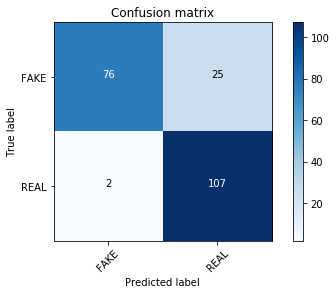

In [10]:


# Inicializamos el modelo: nb_classifier
nb_classifier = MultinomialNB()

# entrenamiento del modelo
nb_classifier.fit(count_train, y_train)

# predecimos sobre el test
pred = nb_classifier.predict(count_test)

# calculamos el accuracy del modelo: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculamos la matriz de confusión: cm
cm = metrics.confusion_matrix(y_test,pred,labels=["FAKE","REAL"])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


### Utilizando  TF-IDF

Training and testing the "fake news" model with TfidfVectorizer

0.7571428571428571
Confusion matrix, without normalization


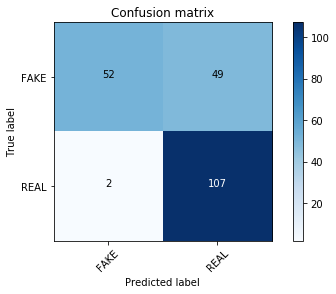

In [11]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


# Mejorando el modelo

¿ Cuales son los próximos pasos que se pueden hacer para mejorar el modelo?
- hyperparameter tunning
- cambiando de modelo de clasificación
- mejorando el preprocesado de texto
- todas las anteriores


In [12]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/home/osboxes/.local/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.85238
Alpha: 0.10 Score: 0.87619
Alpha: 0.20 Score: 0.83810
Alpha: 0.30 Score: 0.81429
Alpha: 0.40 Score: 0.80476
Alpha: 0.50 Score: 0.78571
Alpha: 0.60 Score: 0.77143
Alpha: 0.70 Score: 0.77143
Alpha: 0.80 Score: 0.76667
Alpha: 0.90 Score: 0.76190


Podemos analizar cuales son las palabras que más aparecen en las noticias reales y falsas

In [13]:
feature_names = tfidf_vectorizer.get_feature_names()
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-7.3159095821259434, 'trump'),
 (-7.327513922508375, 'said'),
 (-7.5020112789571005, 'clinton'),
 (-7.795123096966092, 'obama'),
 (-7.925871703476625, 'president'),
 (-8.060015375627088, 'sanders'),
 (-8.073628966775178, 'state'),
 (-8.177188878074102, 'house'),
 (-8.194105791981285, 'republican'),
 (-8.195803787597013, 'campaign'),
 (-8.253027749048169, 'bush'),
 (-8.314589794141808, 'iran'),
 (-8.319446023846313, 'republicans'),
 (-8.322073202145061, 'people'),
 (-8.34173004288155, 'new'),
 (-8.36293286274704, 'party'),
 (-8.383475970463445, 'states'),
 (-8.397464799938186, 'cruz'),
 (-8.407006598619454, 'democratic'),
 (-8.431844898961138, 'percent')]

In [14]:
def hasNumbers(inputString):
     return any(char.isdigit() for char in inputString)

### Most fake
fakes=sorted(zip(clf.coef_[0], feature_names))
list(filter(None, list(map(lambda x: x if not ( hasNumbers(x[1])) else None,fakes))))

[(-10.0930230125976, '__'),
 (-10.0930230125976, 'aa'),
 (-10.0930230125976, 'aaas'),
 (-10.0930230125976, 'aadmi'),
 (-10.0930230125976, 'aam'),
 (-10.0930230125976, 'aap'),
 (-10.0930230125976, 'aba'),
 (-10.0930230125976, 'abandons'),
 (-10.0930230125976, 'abdicate'),
 (-10.0930230125976, 'abdominal'),
 (-10.0930230125976, 'abductees'),
 (-10.0930230125976, 'abductions'),
 (-10.0930230125976, 'abetting'),
 (-10.0930230125976, 'abidance'),
 (-10.0930230125976, 'abitter'),
 (-10.0930230125976, 'abm'),
 (-10.0930230125976, 'aborted'),
 (-10.0930230125976, 'abounds'),
 (-10.0930230125976, 'abraham'),
 (-10.0930230125976, 'abramovic'),
 (-10.0930230125976, 'abrupt'),
 (-10.0930230125976, 'abruptly'),
 (-10.0930230125976, 'absorbed'),
 (-10.0930230125976, 'absorption'),
 (-10.0930230125976, 'abstained'),
 (-10.0930230125976, 'abstaining'),
 (-10.0930230125976, 'abstains'),
 (-10.0930230125976, 'abstention'),
 (-10.0930230125976, 'abuirshaid'),
 (-10.0930230125976, 'abysmal'),
 (-10.093023

# Redes neuronales
Usaremos keras para este propósito.
Recordamos la metodología:
- Especificar la arquitectura
- compilar
- Entrenar el modelo
- validación


In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.wrappers import TimeDistributed
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

# convertimos los textos a una lista
texts=X_train.values.tolist()

# tokenizamos los datos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
index_list = tokenizer.texts_to_matrix(texts)
x_train= pad_sequences(index_list)
# convertimos los labels a 1 y 0 
y = [1 if x=='REAL' else 0 for x in y_train]

# numero de inputs en la input layer vocab_size
vocab_size = len(tokenizer.word_index) + 1

# especificamos la arquitectura
model = Sequential()
model.add(Dense(2, input_dim=vocab_size))
model.add(Dense(1, activation='sigmoid'))
 
# compilamos 
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

# entrenamos el modelo
history =model.fit(x_train, y=y, batch_size=200, nb_epoch=700, verbose=2, validation_split=0.2,shuffle=True)
 

/home/osboxes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 339 samples, validate on 85 samples
Epoch 1/700
 - 1s - loss: 0.6804 - val_loss: 0.5594
Epoch 2/700
 - 0s - loss: 0.4510 - val_loss: 0.5332
Epoch 3/700
 - 0s - loss: 0.3176 - val_loss: 0.5181
Epoch 4/700
 - 0s - loss: 0.2711 - val_loss: 0.4982
Epoch 5/700
 - 0s - loss: 0.2387 - val_loss: 0.4903
Epoch 6/700
 - 0s - loss: 0.2140 - val_loss: 0.4758
Epoch 7/700
 - 0s - loss: 0.1930 - val_loss: 0.4541
Epoch 8/700
 - 0s - loss: 0.1761 - val_loss: 0.4326
Epoch 9/700
 - 0s - loss: 0.1619 - val_loss: 0.4359
Epoch 10/700
 - 0s - loss: 0.1494 - val_loss: 0.4144
Epoch 11/700
 - 0s - loss: 0.1385 - val_loss: 0.4036
Epoch 12/700
 - 0s - loss: 0.1292 - val_loss: 0.3929
Epoch 13/700
 - 0s - loss: 0.1206 - val_loss: 0.3904
Epoch 14/700
 - 0s - loss: 0.1131 - val_loss: 0.3858
Epoch 15/700
 - 0s - loss: 0.1065 - val_loss: 0.3740
Epoch 16/700
 - 0s - loss: 0.1005 - val_loss: 0.3649
Epoch 17/700
 - 0s - loss: 0.0951 - val_loss: 0.3685
Epoch 18/700
 - 0s - loss: 0.0901 - val_loss: 0.3574
Epoch 19/7

Epoch 154/700
 - 0s - loss: 0.0065 - val_loss: 0.3863
Epoch 155/700
 - 0s - loss: 0.0064 - val_loss: 0.3887
Epoch 156/700
 - 0s - loss: 0.0064 - val_loss: 0.3918
Epoch 157/700
 - 0s - loss: 0.0063 - val_loss: 0.3952
Epoch 158/700
 - 0s - loss: 0.0063 - val_loss: 0.3984
Epoch 159/700
 - 0s - loss: 0.0062 - val_loss: 0.4027
Epoch 160/700
 - 0s - loss: 0.0062 - val_loss: 0.4062
Epoch 161/700
 - 0s - loss: 0.0061 - val_loss: 0.4092
Epoch 162/700
 - 0s - loss: 0.0061 - val_loss: 0.4121
Epoch 163/700
 - 0s - loss: 0.0061 - val_loss: 0.4147
Epoch 164/700
 - 0s - loss: 0.0060 - val_loss: 0.4167
Epoch 165/700
 - 0s - loss: 0.0060 - val_loss: 0.4206
Epoch 166/700
 - 0s - loss: 0.0059 - val_loss: 0.4235
Epoch 167/700
 - 0s - loss: 0.0059 - val_loss: 0.4268
Epoch 168/700
 - 0s - loss: 0.0058 - val_loss: 0.4295
Epoch 169/700
 - 0s - loss: 0.0058 - val_loss: 0.4328
Epoch 170/700
 - 0s - loss: 0.0058 - val_loss: 0.4361
Epoch 171/700
 - 0s - loss: 0.0057 - val_loss: 0.4389
Epoch 172/700
 - 0s - loss: 

Epoch 306/700
 - 0s - loss: 0.0021 - val_loss: 0.7914
Epoch 307/700
 - 0s - loss: 0.0021 - val_loss: 0.7931
Epoch 308/700
 - 0s - loss: 0.0021 - val_loss: 0.7947
Epoch 309/700
 - 0s - loss: 0.0020 - val_loss: 0.7964
Epoch 310/700
 - 0s - loss: 0.0020 - val_loss: 0.7981
Epoch 311/700
 - 0s - loss: 0.0020 - val_loss: 0.7998
Epoch 312/700
 - 0s - loss: 0.0020 - val_loss: 0.8016
Epoch 313/700
 - 0s - loss: 0.0020 - val_loss: 0.8033
Epoch 314/700
 - 0s - loss: 0.0020 - val_loss: 0.8051
Epoch 315/700
 - 0s - loss: 0.0019 - val_loss: 0.8067
Epoch 316/700
 - 0s - loss: 0.0019 - val_loss: 0.8083
Epoch 317/700
 - 0s - loss: 0.0019 - val_loss: 0.8101
Epoch 318/700
 - 0s - loss: 0.0019 - val_loss: 0.8117
Epoch 319/700
 - 0s - loss: 0.0019 - val_loss: 0.8133
Epoch 320/700
 - 0s - loss: 0.0019 - val_loss: 0.8150
Epoch 321/700
 - 0s - loss: 0.0018 - val_loss: 0.8166
Epoch 322/700
 - 0s - loss: 0.0018 - val_loss: 0.8181
Epoch 323/700
 - 0s - loss: 0.0018 - val_loss: 0.8195
Epoch 324/700
 - 0s - loss: 

Epoch 454/700
 - 0s - loss: 5.4209e-04 - val_loss: 0.9633
Epoch 455/700
 - 0s - loss: 5.3645e-04 - val_loss: 0.9643
Epoch 456/700
 - 0s - loss: 5.3050e-04 - val_loss: 0.9651
Epoch 457/700
 - 0s - loss: 5.2610e-04 - val_loss: 0.9660
Epoch 458/700
 - 0s - loss: 5.2057e-04 - val_loss: 0.9670
Epoch 459/700
 - 0s - loss: 5.1590e-04 - val_loss: 0.9679
Epoch 460/700
 - 0s - loss: 5.0919e-04 - val_loss: 0.9688
Epoch 461/700
 - 0s - loss: 5.0443e-04 - val_loss: 0.9696
Epoch 462/700
 - 0s - loss: 4.9991e-04 - val_loss: 0.9705
Epoch 463/700
 - 0s - loss: 4.9505e-04 - val_loss: 0.9714
Epoch 464/700
 - 0s - loss: 4.8973e-04 - val_loss: 0.9722
Epoch 465/700
 - 0s - loss: 4.8474e-04 - val_loss: 0.9732
Epoch 466/700
 - 0s - loss: 4.7979e-04 - val_loss: 0.9741
Epoch 467/700
 - 0s - loss: 4.7494e-04 - val_loss: 0.9750
Epoch 468/700
 - 0s - loss: 4.6965e-04 - val_loss: 0.9760
Epoch 469/700
 - 0s - loss: 4.6481e-04 - val_loss: 0.9769
Epoch 470/700
 - 0s - loss: 4.6045e-04 - val_loss: 0.9778
Epoch 471/700


Epoch 596/700
 - 0s - loss: 1.1006e-04 - val_loss: 1.0744
Epoch 597/700
 - 0s - loss: 1.0873e-04 - val_loss: 1.0750
Epoch 598/700
 - 0s - loss: 1.0732e-04 - val_loss: 1.0757
Epoch 599/700
 - 0s - loss: 1.0594e-04 - val_loss: 1.0763
Epoch 600/700
 - 0s - loss: 1.0459e-04 - val_loss: 1.0769
Epoch 601/700
 - 0s - loss: 1.0335e-04 - val_loss: 1.0776
Epoch 602/700
 - 0s - loss: 1.0215e-04 - val_loss: 1.0782
Epoch 603/700
 - 0s - loss: 1.0091e-04 - val_loss: 1.0790
Epoch 604/700
 - 0s - loss: 9.9686e-05 - val_loss: 1.0795
Epoch 605/700
 - 0s - loss: 9.8495e-05 - val_loss: 1.0801
Epoch 606/700
 - 0s - loss: 9.7283e-05 - val_loss: 1.0809
Epoch 607/700
 - 0s - loss: 9.5995e-05 - val_loss: 1.0815
Epoch 608/700
 - 0s - loss: 9.4777e-05 - val_loss: 1.0823
Epoch 609/700
 - 0s - loss: 9.3620e-05 - val_loss: 1.0828
Epoch 610/700
 - 0s - loss: 9.2696e-05 - val_loss: 1.0833
Epoch 611/700
 - 0s - loss: 9.1676e-05 - val_loss: 1.0841
Epoch 612/700
 - 0s - loss: 9.0682e-05 - val_loss: 1.0846
Epoch 613/700


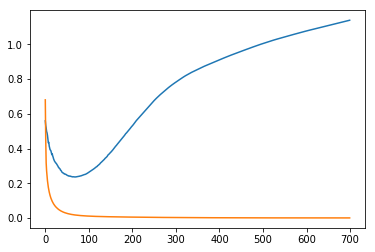

In [17]:
# evaluamos resultados
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

plt.show()

0.8238095238095238
Confusion matrix, without normalization


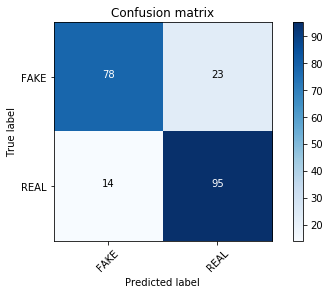

In [18]:
# predict y validacion
texts=X_test.values.tolist()


index_list = tokenizer.texts_to_matrix(texts)
x_test= pad_sequences(index_list)
y = [1 if x=='REAL' else 0 for x in y_test]




pred =model.predict(x_test)
pred = [1 if pr>0.5 else 0 for pr in pred]
# Calculate the accuracy score: score
score = metrics.accuracy_score(y,pred)
print(score)
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y,pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
